## Plot bifurcation diagram for truncated contagion maps in dependence of the noisiness and the treshold T

In [8]:
%load_ext autoreload
%autoreload 2

import cmap as conmap
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set_theme()
import pandas as pd


# Nice labelling
from labellines import labelLine, labelLines


# For pretty colourmaps
import palettable
from matplotlib.colors import ListedColormap



sns.set_style("white")

from sklearn.decomposition import PCA


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# construct the network
noisyRL = conmap.constructNoisyRingLattice(numberNodes=400,geometricDegree=6,nongeometricDegree=2)

In [4]:
# run the contagions for four different thresholds
seeding = list(noisyRL.neighbors(0))
seeding.append(0)
activationTimes_t005 = conmap.simulateWattsThresholdModel(network=noisyRL,initialCondition=seeding,threshold=0.05)
activationTimes_t02 = conmap.simulateWattsThresholdModel(network=noisyRL,initialCondition=seeding,threshold=0.2)
activationTimes_t03 = conmap.simulateWattsThresholdModel(network=noisyRL,initialCondition=seeding,threshold=0.3)
activationTimes_t045 = conmap.simulateWattsThresholdModel(network=noisyRL,initialCondition=seeding,threshold=0.45)

In [5]:
# count the number of active nodes over time

def countNumberActiveNodes(activationTimes,maxTime=None):
    if maxTime is None:
        maxTime = np.nanmax(activationTimes)
    
    numberActiveNodes = []

    # go over the times 
    for t in np.arange(maxTime):
        activeNodes = np.where(activationTimes<=t)[0]
        numberActiveNodes.append(len(activeNodes))
    
    return(numberActiveNodes)

In [6]:
maxTimeAll = 80

numberActiveNodesT005 = countNumberActiveNodes(activationTimes_t005,maxTime=maxTimeAll)
numberActiveNodesT02 = countNumberActiveNodes(activationTimes_t02,maxTime=maxTimeAll)
numberActiveNodesT03 = countNumberActiveNodes(activationTimes_t03,maxTime=maxTimeAll)
numberActiveNodesT045 = countNumberActiveNodes(activationTimes_t045,maxTime=maxTimeAll)




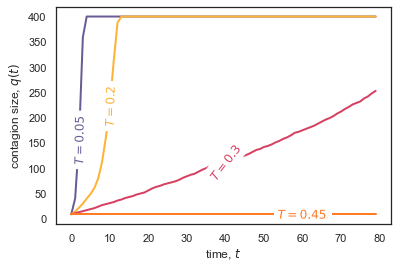

In [9]:
plt.plot(numberActiveNodesT005,color='#6b5b95',linewidth=2.0,label='$T=0.05$')
plt.plot(numberActiveNodesT02,color='#feb236',linewidth=2.0,label='$T=0.2$')
plt.plot(numberActiveNodesT03,color='#d64161',linewidth=2.0,label='$T=0.3$')
plt.plot(numberActiveNodesT045,color='#ff7b25',linewidth=2.0,label='$T=0.45$')
plt.xlabel('time, $t$')
plt.ylabel('contagion size, $q(t)$')
# add labels
labelLines(plt.gca().get_lines(), xvals=(2, 10,40,60), align=True, backgroundcolor='white')
plt.savefig('./figures/Fig4a-numberActiveNodesOverTime.pdf')


In [10]:
# count the number of infections that are predominanlty geometric or non-geometric over time


def countNumberInfections(network,activationTimes,maxTime=None):
    if maxTime is None:
        maxTime = np.nanmax(activationTimes)
    
    numberInfectionsGeometric = []
    numberInfectionsNonGeometric = []

    # go over the times 
    for t in np.arange(maxTime):
        incomingNodes = np.where(activationTimes==t)[0] # nodes that get activated
        outgoingNodes = np.where(activationTimes<t)[0] # nodes that were activated before
        
        edgeTypesInfections = []
        for n1 in incomingNodes:
            for n2 in outgoingNodes:
                if network.has_edge(n1,n2):
                    edgeTypesInfections.append(network[n1][n2]["type"])

        numberInfectionsGeometric.append(edgeTypesInfections.count("geometric"))
        numberInfectionsNonGeometric.append(edgeTypesInfections.count("nongeometric"))
        # numberActiveNodes.append(len(activeNodes))
    
    outDF = pd.DataFrame()
    outDF['activations geometric'] = numberInfectionsGeometric
    outDF['activations nongeometric'] = numberInfectionsNonGeometric
    outDF['time'] = np.arange(maxTime)

    return(outDF)

In [11]:
infectionsGeometry005 = countNumberInfections(noisyRL,activationTimes_t005,maxTime=maxTimeAll)
infectionsGeometry02 = countNumberInfections(noisyRL,activationTimes_t02,maxTime=maxTimeAll)
infectionsGeometry03 = countNumberInfections(noisyRL,activationTimes_t03,maxTime=maxTimeAll)
infectionsGeometry045 = countNumberInfections(noisyRL,activationTimes_t045,maxTime=maxTimeAll)


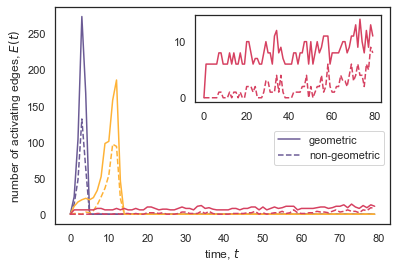

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(infectionsGeometry005['time'],infectionsGeometry005['activations geometric'],color='#6b5b95',label='geometric')
plt.plot(infectionsGeometry005['time'],infectionsGeometry005['activations nongeometric'],color='#6b5b95',linestyle='dashed',label='non-geometric')


plt.plot(infectionsGeometry02['time'],infectionsGeometry02['activations geometric'],color='#feb236')
plt.plot(infectionsGeometry02['time'],infectionsGeometry02['activations nongeometric'],color='#feb236',linestyle='dashed')


plt.plot(infectionsGeometry03['time'],infectionsGeometry03['activations geometric'],color='#d64161')
plt.plot(infectionsGeometry03['time'],infectionsGeometry03['activations nongeometric'],color='#d64161',linestyle='dashed')

plt.xlabel('time, $t$')
plt.ylabel('number of activating edges, $E(t)$')

ax.legend(loc = "center right",bbox_to_anchor=(0.999,0.35))



## add inlay
subplotAxes = fig.add_axes([0.45, 0.55, 0.43, 0.3])
plt.plot(infectionsGeometry03['time'],infectionsGeometry03['activations geometric'],color='#d64161')
plt.plot(infectionsGeometry03['time'],infectionsGeometry03['activations nongeometric'],color='#d64161',linestyle='dashed')

plt.savefig('./figures/Fig4b-edgesInvolvedActivationOverTime.pdf')
